# Visualizing How NATS Performs in Misspecified Settings

In [1]:
import numpy as np
import pandas as pd
import plotnine as gg
import re
import sys
import os
import yaml

import glob 
import pickle


In [2]:
from utils import *

# 1-D Simple Experiment in Linear Environment

In [3]:
save_folder = '../results/plots/main_body/1d_experiment_optimism'

In [4]:
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [8]:
results = load_simulation_results('../data/results/1d_experiment_linear_sd_0_2025-05-14',
 env="linear",  sds = ["sd_0"])


In [9]:
results = results.loc[results.agent_type!='ens-poGAMBITTS']

In [10]:
results['dims_used'] = results['dims_used'].fillna(results['agent_type'])

In [8]:
results.groupby(['dims_used','agent_type']).size()

dims_used           agent_type        
Std TS              Std TS                250000
Std TS: Contextual  Std TS: Contextual    250000
clarity             foGAMBITTS            250000
                    poGAMBITTS            250000
encouragement       foGAMBITTS            250000
                    poGAMBITTS            250000
formality           foGAMBITTS            250000
                    poGAMBITTS            250000
optimism            foGAMBITTS            250000
                    poGAMBITTS            250000
severity            foGAMBITTS            250000
                    poGAMBITTS            250000
dtype: int64

In [19]:
res_correct = results.loc[results.dims_used.isin(['Std TS', "Std TS: Contextual", 'optimism'])]

In [20]:
results.groupby(['dims_used','agent_type']).size()

dims_used           agent_type        
Std TS              Std TS                250000
Std TS: Contextual  Std TS: Contextual    250000
clarity             foGAMBITTS            250000
                    poGAMBITTS            250000
encouragement       foGAMBITTS            250000
                    poGAMBITTS            250000
formality           foGAMBITTS            250000
                    poGAMBITTS            250000
optimism            foGAMBITTS            250000
                    poGAMBITTS            250000
severity            foGAMBITTS            250000
                    poGAMBITTS            250000
dtype: int64

In [21]:
agg_cols = ['agent_type', "dims_used", "t"]
agg_res= get_agg_results(df=res_correct, group_ix=agg_cols) 
sim_cr = agg_res.cum_regret.reset_index()  

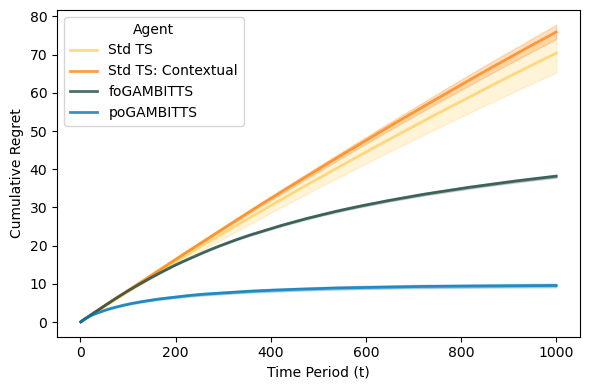

In [22]:
p = ( make_regret_plot_matplotlib(df = sim_cr, 
fill = "agent_type", 
title = ""))
with open(os.path.join(save_folder, '1d_correct_model.pckl'), "wb") as f:
    pickle.dump(p, f)

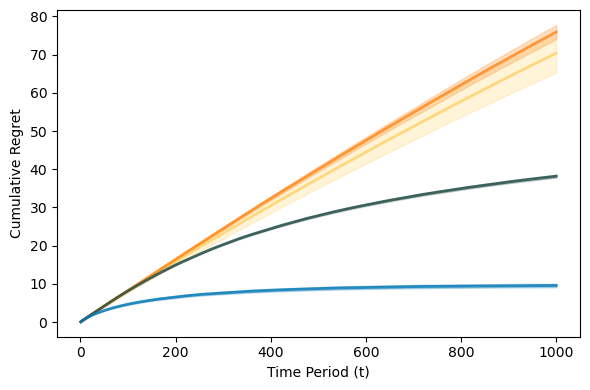

In [23]:
p = ( make_regret_plot_matplotlib(df = sim_cr.loc[sim_cr.t <=t], 
fill = "agent_type", 
title = "",
include_legend=False))
# with open(os.path.join(save_folder, '1d_correct_model_no_legebd.pckl'), "wb") as f:
#     pickle.dump(p, f)

Including new version of ens-poGAMBITTS

In [5]:
results_ens = load_simulation_results('../data/results/1d_experiment_linear_sd_0__ens_2025-05-20',
 env="linear",  sds = ["sd_0"])


In [6]:
results_ens.groupby(['dims_used','agent_type']).size()

dims_used      agent_type    
clarity        ens-poGAMBITTS    250000
encouragement  ens-poGAMBITTS    250000
formality      ens-poGAMBITTS    250000
optimism       ens-poGAMBITTS    250000
severity       ens-poGAMBITTS    250000
dtype: int64

In [11]:
results_ens = pd.concat([results, results_ens])

In [12]:
res_correct = results_ens.loc[results_ens.dims_used.isin(['Std TS', "Std TS: Contextual", 'optimism'])]
agg_cols = ['agent_type', "dims_used", "t"]
agg_res= get_agg_results(df=res_correct, group_ix=agg_cols) 
sim_cr = agg_res.cum_regret.reset_index()  

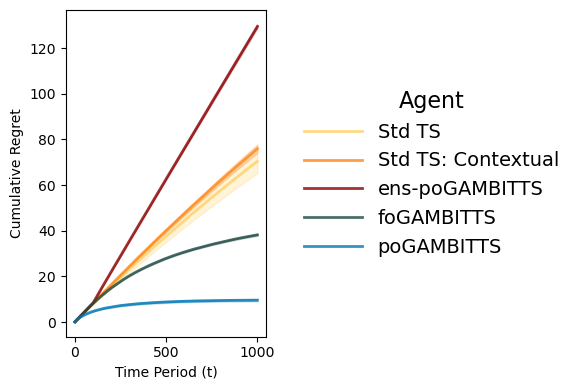

In [13]:
p = ( make_regret_plot_matplotlib(df = sim_cr, 
fill = "agent_type", 
title = ""))

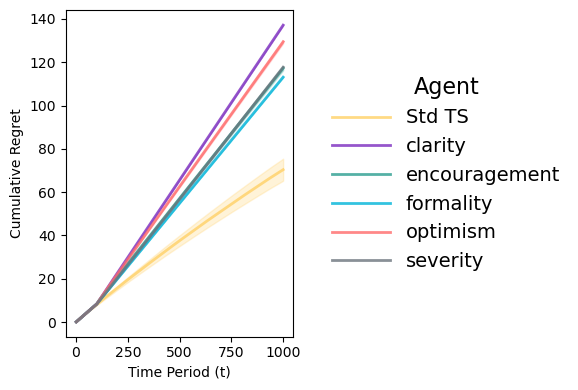

In [14]:
agg_cols = ['agent_type', "dims_used", "t"]
agg_res= get_agg_results(df=results_ens, group_ix=agg_cols) 
sim_cr = agg_res.cum_regret.reset_index()  

agents=['ens-poGAMBITTS','Std TS']
p = ( make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(agents))], 
fill = "dims_used", 
title = ""))

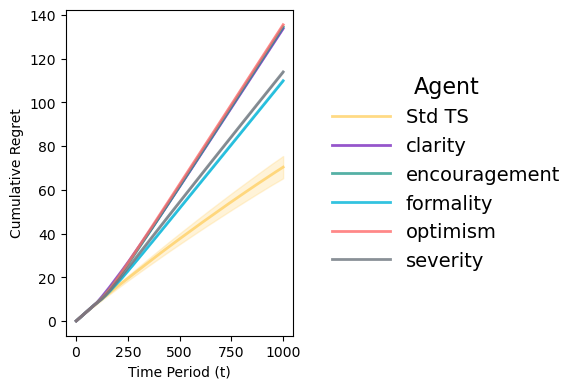

In [15]:
agg_cols = ['agent_type', "dims_used", "t"]
agg_res= get_agg_results(df=results_ens, group_ix=agg_cols) 
sim_cr = agg_res.cum_regret.reset_index()  

agents=['ens-poGAMBITTS','Std TS']
p = ( make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(agents))], 
fill = "dims_used", 
title = ""))

In [17]:
results_ens_old = load_simulation_results('../data/results/1d_experiment_linear_sd_0_2025-05-14', agents=['poNATS-ensemble'],
 env="linear",  sds = ["sd_0"])

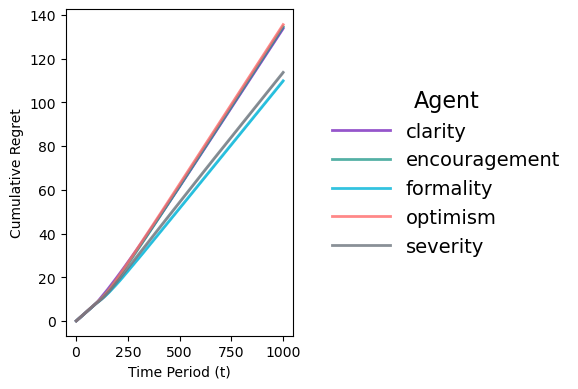

In [18]:
agg_cols = ['agent_type', "dims_used", "t"]
agg_res= get_agg_results(df=results_ens_old, group_ix=agg_cols) 
sim_cr = agg_res.cum_regret.reset_index()  

p = ( make_regret_plot_matplotlib(df = sim_cr, 
fill = "dims_used", 
title = ""))

### poNATS Linear 1-D misspecification

In [24]:
save_folder = '../results/plots/main_body/1d_experiment_linear_sd_0'

In [25]:
agg_cols = ['agent_type', "dims_used", "t"]
agg_res= get_agg_results(df=results, group_ix=agg_cols) 
sim_cr = agg_res.cum_regret.reset_index() 

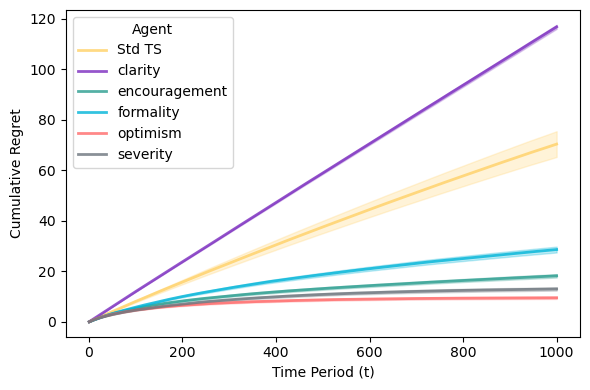

In [27]:
agents=['poGAMBITTS','Std TS']

p = ( make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(agents)) & (sim_cr.t <= t)], 
fill = "dims_used", 
title = ""))
with open(os.path.join(save_folder, 'ponats_1d_linear.pckl'), "wb") as f:
    pickle.dump(p, f)
# p

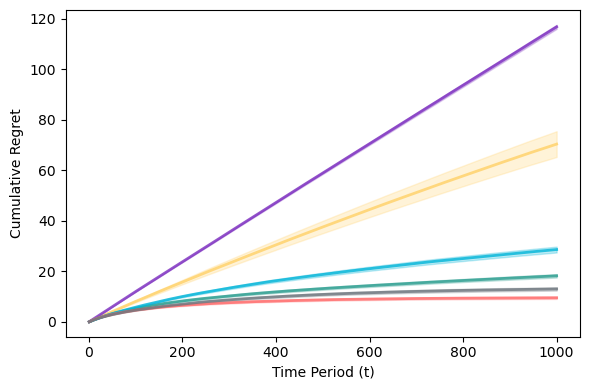

In [28]:
p = ( make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(agents)) & (sim_cr.t <= t)], 
fill = "dims_used", 
title = "",
include_legend=False))
with open(os.path.join(save_folder, 'ponats_1d_linear_no_legend.pckl'), "wb") as f:
    pickle.dump(p, f)

### foNATS Linear 1-D misspecification

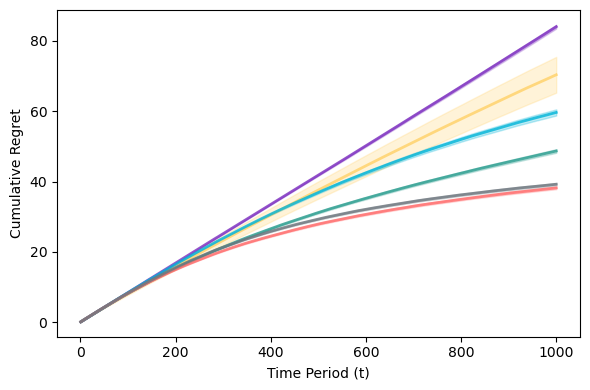

In [29]:
agents=['foGAMBITTS','Std TS']

p = ( make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(agents)) & (sim_cr.t <= t)], 
fill = "dims_used", 
title = "",
include_legend=False))
with open(os.path.join(save_folder, 'fonats_1d_linear.pckl'), "wb") as f:
    pickle.dump(p, f)

### ens-poNATS

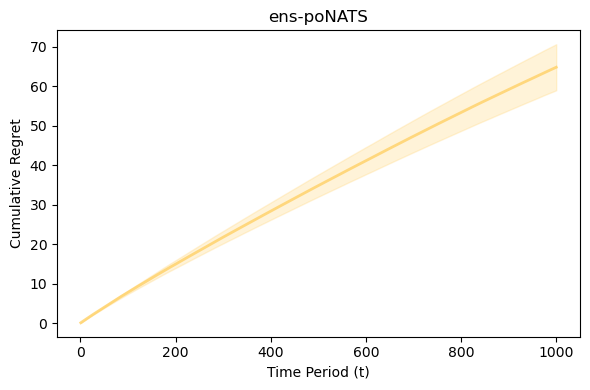

In [27]:
agents=['ens-poNATS','MAB']

p = ( make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(agents)) & (sim_cr.t <= t)], 
fill = "dims_used", 
title = "ens-poNATS",
include_legend=False))
with open(os.path.join(save_folder, 'ens_ponats_1d_linear.pckl'), "wb") as f:
    pickle.dump(p, f)

#

In [4]:
results = load_simulation_results('../data/results/1d_experiment_linear_sd_0__ens',
 env="linear",  sds = ["sd_0"])


In [7]:
results.agent_type.value_counts()

agent_type
ens-poGAMBITTS    250000
Name: count, dtype: int64

In [8]:
agg_cols = ['agent_type', "dims_used", "t"]
agg_res= get_agg_results(df=results, group_ix=agg_cols) 
sim_cr = agg_res.cum_regret.reset_index() 

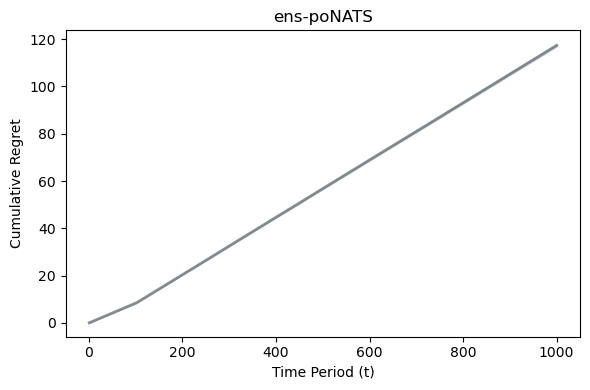

In [9]:

p = ( make_regret_plot_matplotlib(df = sim_cr, 
fill = "dims_used", 
title = "ens-poNATS",
include_legend=False))

In [10]:
sim_cr

,agent_type,dims_used,t,mean,std,count,se,ci_lb,ci_ub
0,ens-poGAMBITTS,severity,1,0.080577,0.050478,250,0.003193,0.074320,0.086835
1,ens-poGAMBITTS,severity,2,0.163480,0.075953,250,0.004804,0.154064,0.172895
2,ens-poGAMBITTS,severity,3,0.247794,0.095474,250,0.006038,0.235959,0.259629
3,ens-poGAMBITTS,severity,4,0.332794,0.109434,250,0.006921,0.319228,0.346359
4,ens-poGAMBITTS,severity,5,0.421537,0.124077,250,0.007847,0.406157,0.436918
...,...,...,...,...,...,...,...,...,...
995,ens-poGAMBITTS,severity,996,116.841945,3.879239,250,0.245345,116.361070,117.322821
996,ens-poGAMBITTS,severity,997,116.966527,3.884435,250,0.245673,116.485007,117.448046
997,ens-poGAMBITTS,severity,998,117.088386,3.889176,250,0.245973,116.606278,117.570493
998,ens-poGAMBITTS,severity,999,117.212420,3.889917,250,0.246020,116.730221,117.694619
